In [50]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import dask.dataframe as dd

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

In [51]:
# Load the dataset
data = pd.read_csv('/Users/prudhvivuda/Documents/usml/lyft/data.csv')  
data.head()

,rideable_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_casual
0,classic_bike,2021-10-20 13:27:56,2021-10-20 13:34:37,San Fernando St at 4th St,SJ-M10-2,2nd St at Julian St,SJ-K10,37.335885,-121.885660,37.341132,-121.892844,member
1,electric_bike,2021-10-15 13:16:01,2021-10-15 13:17:33,Jersey St at Castro St,SF-R19,Jersey St at Church St,SF-R20,37.750494,-122.433891,37.750882,-122.427622,member
2,classic_bike,2021-10-13 12:12:46,2021-10-13 12:21:22,The Embarcadero at Sansome St,SF-A27,Montgomery St BART Station (Market St at 2nd St),SF-F28-2,37.804770,-122.403234,37.789620,-122.400808,member
3,classic_bike,2021-10-13 17:45:55,2021-10-13 18:02:31,Valencia St at 21st St,SF-P22,Folsom St at 5th St,SF-I27,37.756708,-122.421025,37.780738,-122.402728,member
4,classic_bike,2021-10-18 15:09:26,2021-10-18 15:43:16,Russell St at College Ave,BK-H10,Telegraph Ave at Carleton St,BK-F9,37.858473,-122.253253,37.862320,-122.258801,casual


In [52]:
print("The size of the dataframe",data.shape)
data.columns

The size of the dataframe (7396779, 12)


Index(['rideable_type', 'start_time', 'end_time', 'start_station_name',
       'start_station_id', 'end_station_name', 'end_station_id',
       'start_station_latitude', 'start_station_longitude',
       'end_station_latitude', 'end_station_longitude', 'member_casual'],
      dtype='object')

In [53]:
data.isnull().sum()

rideable_type                    0
start_time                       0
end_time                         0
start_station_name         1191576
start_station_id           1195830
end_station_name           1352191
end_station_id             1356527
start_station_latitude           0
start_station_longitude          0
end_station_latitude          6932
end_station_longitude         6932
member_casual                    0
dtype: int64

In [54]:
data = data.dropna(axis=0)

In [55]:
data.isnull().sum()

rideable_type              0
start_time                 0
end_time                   0
start_station_name         0
start_station_id           0
end_station_name           0
end_station_id             0
start_station_latitude     0
start_station_longitude    0
end_station_latitude       0
end_station_longitude      0
member_casual              0
dtype: int64

In [56]:
data.shape

(5426091, 12)

In [57]:
data.head()

,rideable_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_casual
0,classic_bike,2021-10-20 13:27:56,2021-10-20 13:34:37,San Fernando St at 4th St,SJ-M10-2,2nd St at Julian St,SJ-K10,37.335885,-121.885660,37.341132,-121.892844,member
1,electric_bike,2021-10-15 13:16:01,2021-10-15 13:17:33,Jersey St at Castro St,SF-R19,Jersey St at Church St,SF-R20,37.750494,-122.433891,37.750882,-122.427622,member
2,classic_bike,2021-10-13 12:12:46,2021-10-13 12:21:22,The Embarcadero at Sansome St,SF-A27,Montgomery St BART Station (Market St at 2nd St),SF-F28-2,37.804770,-122.403234,37.789620,-122.400808,member
3,classic_bike,2021-10-13 17:45:55,2021-10-13 18:02:31,Valencia St at 21st St,SF-P22,Folsom St at 5th St,SF-I27,37.756708,-122.421025,37.780738,-122.402728,member
4,classic_bike,2021-10-18 15:09:26,2021-10-18 15:43:16,Russell St at College Ave,BK-H10,Telegraph Ave at Carleton St,BK-F9,37.858473,-122.253253,37.862320,-122.258801,casual


In [58]:
# Drop columns except start_station_name, member_casual, and rideable_type
# data = data[['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'member_casual', 'rideable_type']]
data = data[['member_casual', 'rideable_type']]
data.head()

,member_casual,rideable_type
0,member,classic_bike
1,member,electric_bike
2,member,classic_bike
3,member,classic_bike
4,casual,classic_bike


In [59]:
data = data.drop(data[data['rideable_type'] == 'docked_bike'].index)


In [60]:
# # Frequency Encoding on start_station_name
# frequency_map = data['start_station_name'].value_counts() # normalize=True inside the function
# data['start_station_name_freq'] = data['start_station_name'].map(frequency_map)

# print(frequency_map)

# data = data.drop('start_station_name', axis=1) 
# data.head()

In [61]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['rideable_type',  'member_casual']) 
one_hot_encoded_data.head()

,rideable_type_classic_bike,rideable_type_electric_bike,member_casual_casual,member_casual_member
0,True,False,False,True
1,False,True,False,True
2,True,False,False,True
3,True,False,False,True
4,True,False,True,False


/Users/prudhvivuda/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/prudhvivuda/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/prudhvivuda/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/prudhvivuda/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit

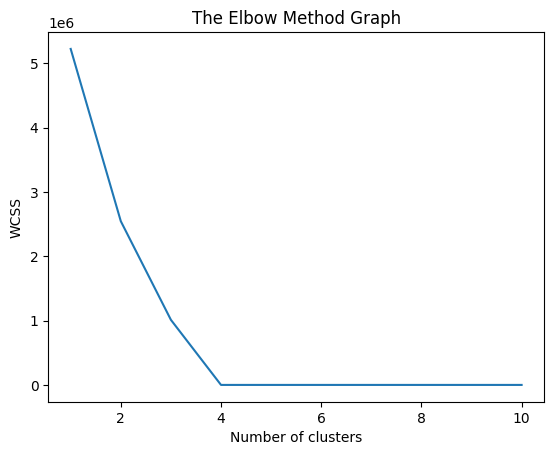

In [62]:
from sklearn.cluster import KMeans
wcss=[]
#this loop will fit the k-means algorithm to our data and 
#second we will compute the within cluster sum of squares and #appended to our wcss list.
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
#i above is between 1-10 numbers. init parameter is the random #initialization method  
#we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to 
#find the final clusters when the K-meands algorithm is running. we #enter the default value of 300
#the next parameter is n_init which is the number of times the #K_means algorithm will be run with
#different initial centroid.
     kmeans.fit(one_hot_encoded_data)
     #kmeans algorithm fits to the X dataset
     wcss.append(kmeans.inertia_)
#kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.
#4.Plot the elbow graph
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
wcss

[5222368.787760034,
 2544741.283610487,
 1011551.809040611,
 1.1604255815551685e-18,
 1.1606411769166887e-18,
 1.1604301446457694e-18,
 1.160666140853951e-18,
 1.1605436431586118e-18,
 1.1605899754551924e-18,
 1.1607498635824599e-18]

In [64]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(one_hot_encoded_data)

In [65]:
# Add cluster labels to the DataFrame
one_hot_encoded_data['cluster'] = clusters

# Analyze clusters
cluster_analysis = one_hot_encoded_data.groupby('cluster').agg(['mean', 'median', 'std', 'min', 'max'])

# Print cluster analysis
cluster_analysis.head()

# cluster_descriptive_stats = df_encoded.groupby('Cluster').agg(['mean', 'median', 'std', 'min', 'max'])


rideable_type_classic_bike                           rideable_type_electric_bike                           member_casual_casual                           member_casual_member                          
                              mean median  std    min    max                        mean median  std    min    max                 mean median  std    min    max                 mean median  std    min    max
cluster                                                                                                                                                                                                         
0                              0.0    0.0  0.0  False  False                         1.0    1.0  0.0   True   True                  0.0    0.0  0.0  False  False                  1.0    1.0  0.0   True   True
1                              1.0    1.0  0.0   True   True                         0.0    0.0  0.0  False  False                  0.0    0.0  0.0  False  False                  1.0    1.0  0.0   True   True
2                              0.0    0.0  0.0  False  False                         1.0    1.0  0.0   True   True                  1.0    1.0  0.0   True   True                  0.0    0.0  0.0  False  False
3                              1.0    1.0  0.0   True   True                         0.0    0.0  0.0  False  False                  1.0    1.0  0.0   True   True                  0.0    0.0  0.0  False  False

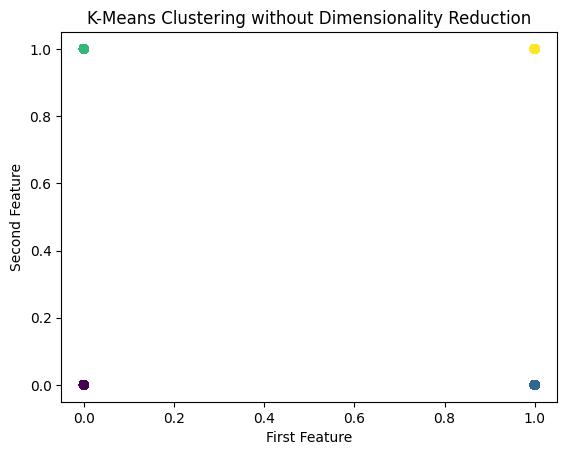

In [67]:
plt.scatter(one_hot_encoded_data.iloc[:, 0], one_hot_encoded_data.iloc[:, 2], c=clusters, cmap='viridis')
plt.title('K-Means Clustering without Dimensionality Reduction')
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.show()

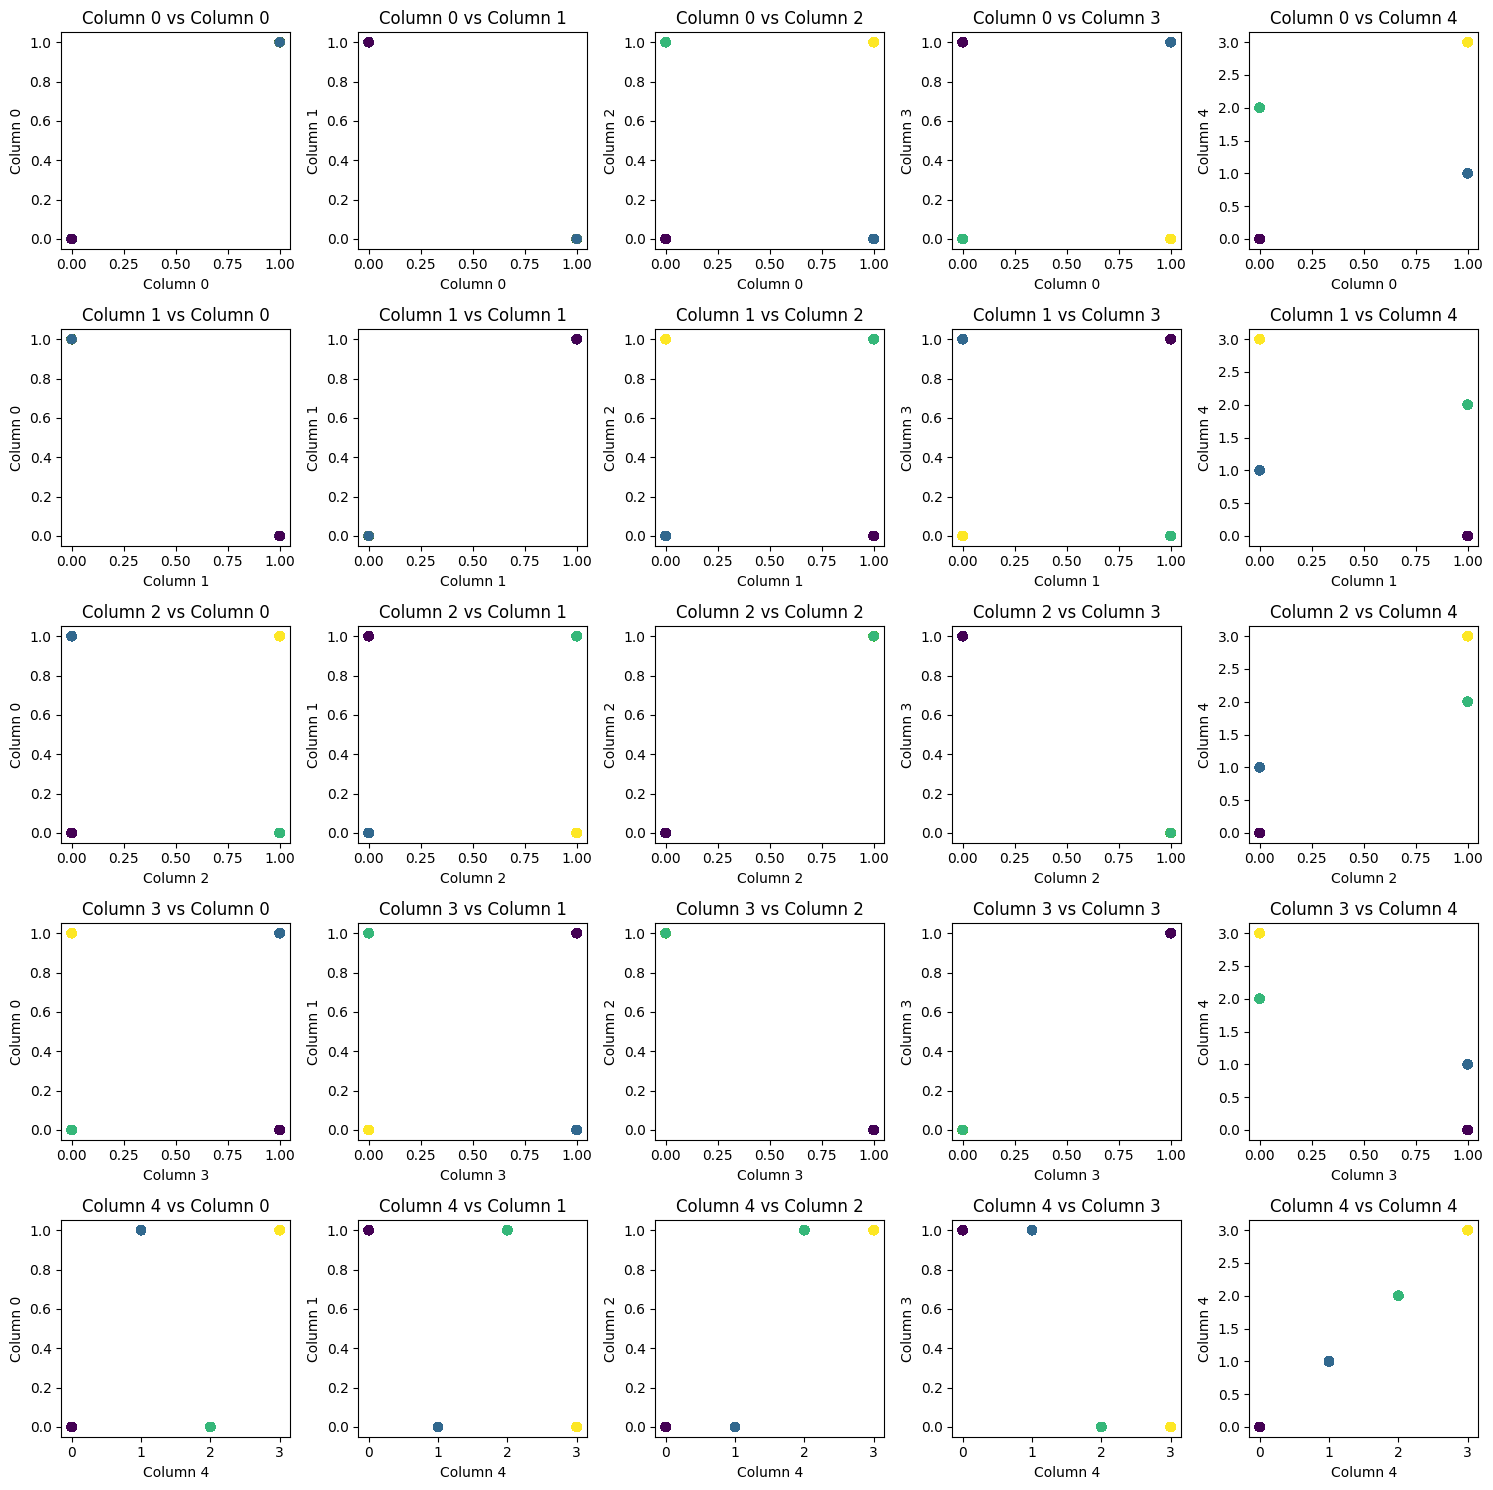

In [68]:
# Plot scatter plots for all possible pairs of columns
num_columns = len(one_hot_encoded_data.columns)
fig, axs = plt.subplots(num_columns, num_columns, figsize=(15, 15))

for i in range(num_columns):
    for j in range(num_columns):
        axs[i, j].scatter(one_hot_encoded_data.iloc[:, i], one_hot_encoded_data.iloc[:, j], c=clusters, cmap='viridis')
        axs[i, j].set_title(f'Column {i} vs Column {j}')
        axs[i, j].set_xlabel(f'Column {i}')
        axs[i, j].set_ylabel(f'Column {j}')

plt.tight_layout()
plt.show()
